In [1]:
# Courtesy of I Nyoman Narayan Kitas Utama

import pandas as pd

# Extract the TTC Subway Delay dataset
df = pd.read_csv("./subway-data.csv")

df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024/01/01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
1,2024/01/01,02:00,Monday,DUNDAS STATION,MUIS,0,0,N,YU,0
2,2024/01/01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024/01/01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024/01/01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
...,...,...,...,...,...,...,...,...,...,...
24117,2024/11/30,10:30,Saturday,ISLINGTON STATION,TUSC,0,0,W,SHP,5067
24118,2024/11/30,15:26,Saturday,SHEPPARD-YONGE STATION,MUIRS,0,0,NaN,SHP,0
24119,2024/11/30,21:19,Saturday,LESLIE STATION,TUO,7,14,W,SHP,6171
24120,2024/11/30,23:59,Saturday,SHEPPARD-YONGE STATION,PUSO,0,0,W,SHP,6181


In [41]:
# Remove all data without proper vehicle ID
subway_data_V1 = df[df['Vehicle'] > 0].copy()

subway_data_V1

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2024/01/01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491
2,2024/01/01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051
3,2024/01/01,02:13,Monday,KENNEDY BD STATION,PUTDN,10,16,E,BD,5284
4,2024/01/01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986
5,2024/01/01,02:25,Monday,ST CLAIR STATION,MUPAA,3,9,N,YU,6051
...,...,...,...,...,...,...,...,...,...,...
24113,2024/11/30,00:33,Saturday,EGLINTON WEST STATION,MUIRS,0,0,N,YU,5676
24114,2024/11/30,00:35,Saturday,LAWRENCE STATION,SUO,5,11,S,YU,5956
24117,2024/11/30,10:30,Saturday,ISLINGTON STATION,TUSC,0,0,W,SHP,5067
24119,2024/11/30,21:19,Saturday,LESLIE STATION,TUO,7,14,W,SHP,6171


In [42]:
# We still have a few missing values (NaN)
subway_data_V1.isna().sum()

Date           0
Time           0
Day            0
Station        0
Code           0
Min Delay      0
Min Gap        0
Bound        300
Line           2
Vehicle        0
dtype: int64

In [43]:
# Filter data with missing Bound value
subway_data_V2 = subway_data_V1[subway_data_V1['Bound'].notna()].copy()

# Conveniently, all missing values are gone
subway_data_V2.isna().sum()

Date         0
Time         0
Day          0
Station      0
Code         0
Min Delay    0
Min Gap      0
Bound        0
Line         0
Vehicle      0
dtype: int64

In [44]:
# Some defective identification on Lines (YUS instead of YU)
subway_data_V2.Line.value_counts()

Line
YU     7510
BD     5788
SHP     522
YUS       2
Name: count, dtype: int64

In [13]:
# Merge Line YUS into Line YU
subway_data_V2.Line = subway_data_V2.Line.replace('YUS', 'YU')

# Display all stations
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

print(subway_data_V2['Station'].value_counts())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Station
BLOOR STATION             575
KIPLING STATION           505
KENNEDY BD STATION        470
EGLINTON STATION          383
FINCH STATION             362
YONGE BD STATION          361
VAUGHAN MC STATION        296
DUNDAS STATION            291
DAVISVILLE STATION        286
ST GEORGE YUS STATION     281
WILSON STATION            277
UNION STATION             266
VICTORIA PARK STATION     260
ST CLAIR STATION          258
KEELE STATION             251
ST GEORGE BD STATION      249
WARDEN STATION            241
COXWELL STATION           226
WELLESLEY STATION         225
SHEPPARD STATION          222
COLLEGE STATION           212
ISLINGTON STATION         212
YORK MILLS STATION        211
LAWRENCE STATION          210
ROSEDALE STATION          198
ST CLAIR WEST STATION     194
SPADINA BD STATION        189
MAIN STREET STATION       182
SHEPPARD-YONGE STATION    177
WOODBINE STATION          177
SUMMERHILL STATION        171
SHEPPARD WEST STATION     170
NORTH YORK CTR STATION    167
OL

In [17]:
# Notice that for any "Stations" with under 46 occurrence, they're either carpark stations or improper formatting
# Since the occurrence is small, filtering it is better than grouping it to Misc or Others

value_counts = subway_data_V2['Station'].value_counts()

# Set threshold
threshold = 45
valid_values = value_counts[value_counts > threshold].index

# Filter the DataFrame
subway_data_V3 = subway_data_V2[subway_data_V2['Station'].isin(valid_values)].copy()

# Should be good now
# Display all stations (again)
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

print(subway_data_V3['Station'].value_counts())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Station
BLOOR STATION             575
KIPLING STATION           505
KENNEDY BD STATION        470
EGLINTON STATION          383
FINCH STATION             362
YONGE BD STATION          361
VAUGHAN MC STATION        296
DUNDAS STATION            291
DAVISVILLE STATION        286
ST GEORGE YUS STATION     281
WILSON STATION            277
UNION STATION             266
VICTORIA PARK STATION     260
ST CLAIR STATION          258
KEELE STATION             251
ST GEORGE BD STATION      249
WARDEN STATION            241
COXWELL STATION           226
WELLESLEY STATION         225
SHEPPARD STATION          222
ISLINGTON STATION         212
COLLEGE STATION           212
YORK MILLS STATION        211
LAWRENCE STATION          210
ROSEDALE STATION          198
ST CLAIR WEST STATION     194
SPADINA BD STATION        189
MAIN STREET STATION       182
SHEPPARD-YONGE STATION    177
WOODBINE STATION          177
SUMMERHILL STATION        171
SHEPPARD WEST STATION     170
OLD MILL STATION          167
NO

In [18]:
# Display all delay codes
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

print(subway_data_V3['Code'].value_counts())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Code
SUDP     1730
MUPAA    1602
PUOPO    1351
SUO      1165
MUIR      710
SUUT      568
MUSC      494
TUSC      453
MUSAN     398
MUI       393
TUO       295
MUO       257
EUSC      248
MUATC     243
SUAP      239
MUDD      211
EUDO      191
TUMVS     173
SUG       167
MUIRS     161
MUTO      137
MUIS      116
MUD       108
EUNT       99
PUSAC      90
TUNIP      86
PUSTS      82
SUEAS      78
PUTWZ      76
SUAE       75
PUTO       68
TUCC       61
MUPLB      57
PUTR       56
TUNOA      55
PUSTC      54
SUPOL      51
PUSI       50
EUBK       48
EUCD       48
TUOS       48
TUS        43
PUSRA      42
PUSNT      38
TUATC      38
PUSSW      36
EUVE       35
EUO        35
EUYRD      34
SUSA       31
TUSUP      30
PUSO       29
MUPR1      28
PUSCR      27
EUBO       26
EUAC       25
EUME       24
PUTDN      24
EUPI       22
EUVA       22
MUTD       21
MUCL       19
MUWEA      18
SUROB      18
MUIE       17
PUEO       16
TUOPO      15
PUTD       14
EUOPO      14
PUTOE      14
PUSWZ      13
M

In [22]:
# Low occurences of delay codes causes unnecessary category
# Let's group it together!
subway_data_V4 = subway_data_V3.copy()

# Set the threshold for low occurrences
threshold2 = 30

# Count the occurrences of each label in the 'Category' column
value_counts2 = subway_data_V4['Code'].value_counts()

# Identify categories that occur less than the threshold
low_occurrence_categories2 = value_counts2[value_counts2 < threshold2].index

# Replace those categories with 'OTHERS' (Since delay codes are still important, we can't filter it out)
subway_data_V4['Code'] = subway_data_V4['Code'].replace(low_occurrence_categories2, 'OTHERS')

# To make sure it grouped together the roughly the low 5%-ish
cnt = (subway_data_V4['Code'] == 'OTHERS').sum()
cnt/subway_data_V4.shape[0]

0.04785005512679162

In [24]:
# Display all delay codes again
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

print(subway_data_V4['Code'].value_counts())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Code
SUDP      1730
MUPAA     1602
PUOPO     1351
SUO       1165
MUIR       710
OTHERS     651
SUUT       568
MUSC       494
TUSC       453
MUSAN      398
MUI        393
TUO        295
MUO        257
EUSC       248
MUATC      243
SUAP       239
MUDD       211
EUDO       191
TUMVS      173
SUG        167
MUIRS      161
MUTO       137
MUIS       116
MUD        108
EUNT        99
PUSAC       90
TUNIP       86
PUSTS       82
SUEAS       78
PUTWZ       76
SUAE        75
PUTO        68
TUCC        61
MUPLB       57
PUTR        56
TUNOA       55
PUSTC       54
SUPOL       51
PUSI        50
EUCD        48
EUBK        48
TUOS        48
TUS         43
PUSRA       42
TUATC       38
PUSNT       38
PUSSW       36
EUVE        35
EUO         35
EUYRD       34
SUSA        31
TUSUP       30
Name: count, dtype: int64


In [25]:
# Since we want to predict minimum delay time using a random forest classifier, let's group the delay time into two
# Usually, people hate waiting a 5+ minutes delay
# Reference: https://www.6sqft.com/how-long-should-you-wait-for-the-subway-before-giving-up/

bins = [-1, 4, 999]  # Define range edges
labels = ['<5 minutes', '5+ minutes']  # Define labels

# Create a new column with the range category
subway_data_V4['delay_group'] = pd.cut(subway_data_V4['Min Delay'], bins=bins, labels=labels)

subway_data_V4.delay_group.value_counts()

delay_group
<5 minutes    8861
5+ minutes    4744
Name: count, dtype: int64

In [36]:
subway_data_V4

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,delay_group
0,2024/01/01,02:00,Monday,SHEPPARD STATION,MUI,0,0,N,YU,5491,<5 minutes
2,2024/01/01,02:08,Monday,DUNDAS STATION,MUPAA,4,10,N,YU,6051,<5 minutes
3,2024/01/01,02:13,Monday,KENNEDY BD STATION,OTHERS,10,16,E,BD,5284,5+ minutes
4,2024/01/01,02:22,Monday,BLOOR STATION,MUPAA,4,10,N,YU,5986,<5 minutes
5,2024/01/01,02:25,Monday,ST CLAIR STATION,MUPAA,3,9,N,YU,6051,<5 minutes
...,...,...,...,...,...,...,...,...,...,...,...
24113,2024/11/30,00:33,Saturday,EGLINTON WEST STATION,MUIRS,0,0,N,YU,5676,<5 minutes
24114,2024/11/30,00:35,Saturday,LAWRENCE STATION,SUO,5,11,S,YU,5956,5+ minutes
24117,2024/11/30,10:30,Saturday,ISLINGTON STATION,TUSC,0,0,W,SHP,5067,<5 minutes
24119,2024/11/30,21:19,Saturday,LESLIE STATION,TUO,7,14,W,SHP,6171,5+ minutes


In [48]:
# What will be fed onto our model
# Thus, I convert everything into numbers

from sklearn.preprocessing import LabelEncoder

subway_data_V5 = subway_data_V4.copy()

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Category' column
subway_data_V5['Station'] = encoder.fit_transform(subway_data_V5['Station'])
subway_data_V5['Code'] = encoder.fit_transform(subway_data_V5['Code'])
subway_data_V5['Day'] = encoder.fit_transform(subway_data_V5['Day'])
subway_data_V5['delay_group'] = encoder.fit_transform(subway_data_V5['delay_group'])
# Invert this, since we want <5 minutes to be label 1 (or True)
subway_data_V5['delay_group'] = 1 - subway_data_V5['delay_group']
subway_data_V5['time_hour'] = subway_data_V5['Time'].str[:2].astype(int)
subway_data_V5['date_month'] = subway_data_V5['Date'].str[5:7].astype(int)

subway_data_V5

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,delay_group,time_hour,date_month
0,2024/01/01,02:00,1,50,11,0,0,N,YU,5491,0,2,1
2,2024/01/01,02:08,1,16,16,4,10,N,YU,6051,0,2,1
3,2024/01/01,02:13,1,30,21,10,16,E,BD,5284,1,2,1
4,2024/01/01,02:22,1,4,16,4,10,N,YU,5986,0,2,1
5,2024/01/01,02:25,1,57,16,3,9,N,YU,6051,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24113,2024/11/30,00:33,2,20,13,0,0,N,YU,5676,0,0,11
24114,2024/11/30,00:35,2,34,38,5,11,S,YU,5956,1,0,11
24117,2024/11/30,10:30,2,27,50,0,0,W,SHP,5067,0,10,11
24119,2024/11/30,21:19,2,36,47,7,14,W,SHP,6171,1,21,11


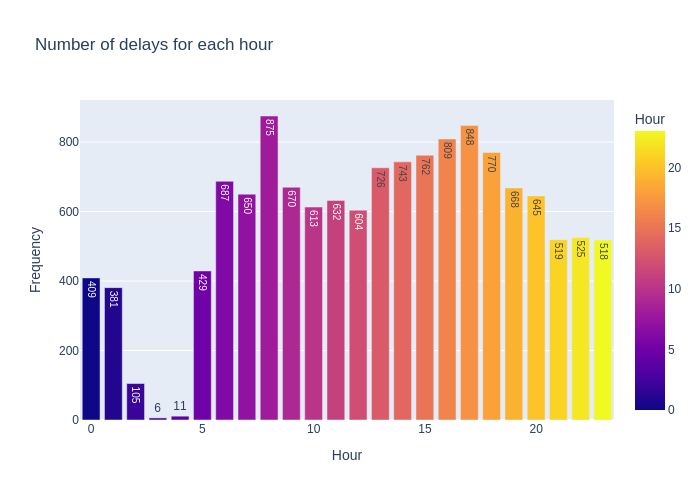

In [46]:
# Number of delays for each hour (uses 24 hour system)
# How to interpret: Hour 0 means from 00:00 to 00:59, Hour 15 means from 15:00 to 15:59

import plotly.express as px

# Count occurrences
value_counts = subway_data_V5['time_hour'].value_counts().reset_index()
value_counts.columns = ['Hour', 'Frequency']

# Visualize
fig = px.bar(value_counts, x='Hour', y='Frequency', title='Number of delays for each hour', 
             text='Frequency', color='Hour')
fig.show(renderer='png')

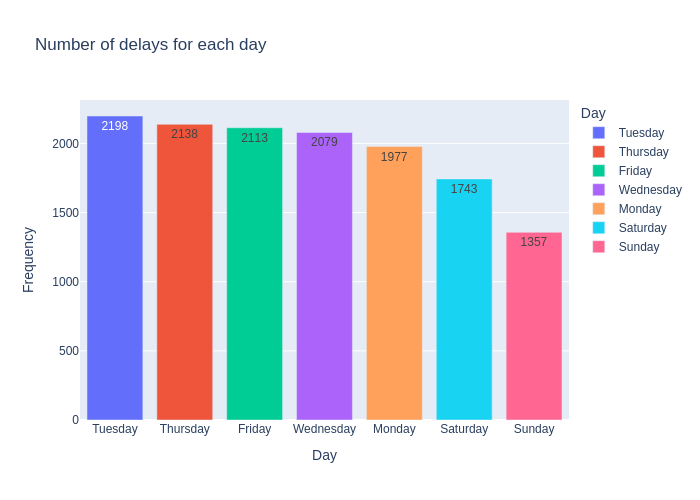

In [47]:
# Number of delays for each day

import plotly.express as px

# Count occurrences
value_counts = subway_data_V4['Day'].value_counts().reset_index()
value_counts.columns = ['Day', 'Frequency']

# Visualize
fig = px.bar(value_counts, x='Day', y='Frequency', title='Number of delays for each day', 
             text='Frequency', color='Day')
fig.show(renderer='png')